In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [11]:
# data loading

act_path = os.getcwd()
weights = np.zeros((96,78))
delay = np.zeros((96,78))
fitness= np.zeros((96))
range_weights = 20.
range_delay = np.array([1.,10.])
range_fitness = 10000.

for data_number in range(96):
    file_name = "individual_99_" + str(data_number) + "_result.csv"
    data_path = os.path.join(act_path, "csv_files_data1", file_name)
    df = pd.read_csv(data_path, delimiter=',', header=None)
    df = df.to_numpy()
    weights[data_number,:] = df[0,:]
    delay[data_number,:] = df[1,:]
    fitness[data_number] = df[2,0] 
    
fit_mean = np.mean(fitness) # to do: min, max, mean, standerd dev.
# print(fit_mean)

# numpy arrays
weights = np.clip(weights, -20., 20.)
delay = np.clip(delay, 1., 10.)
fitness = np.clip(fitness, -10000., 10000.)

# data frames for all indiviuals together
weights_df = pd.DataFrame(weights)
delay_df = pd.DataFrame(delay)
fitness_df = pd.DataFrame(fitness)

# data frames for each individual (weights + delay)
df_list = []
weights_delay = np.zeros((78,2))
for data_number in range(96):
    weights_delay[:,0] = weights[data_number, :]
    weights_delay[:,1] = delay[data_number, :]
    df_list.append(pd.DataFrame(weights_delay))


In [12]:
# pathes for input 1 to 6 from every node

weight_traces = np.zeros((96,2,6))
delay_traces = np.zeros((96,2,6))
for data_number in range(weights.shape[0]):
    node_sum_weights = np.zeros((2,6))
    node_sum_delay = np.zeros((2,6))
    for connect12 in range(36):
        for connect22 in range(36,66):
            for connect23 in range(66,78):
                weight = weights[data_number, connect12]
                weight *= weights[data_number, connect22]
                weight *= weights[data_number, connect23]
                one_delay = delay[data_number, connect12]
                one_delay *= delay[data_number, connect22]
                one_delay *= delay[data_number, connect23]
                if connect23%2 == 0:
                    last_node = 1
                else:
                    last_node = 0                
                if connect12 < 6:
                    node_sum_weights[last_node,0] += weight
                    node_sum_delay[last_node,0] += one_delay
                elif connect12 < 12:
                    node_sum_weights[last_node,1] += weight
                    node_sum_delay[last_node,1] += one_delay
                elif connect12 < 18:
                    node_sum_weights[last_node,2] += weight
                    node_sum_delay[last_node,2] += one_delay
                elif connect12 < 24:
                    node_sum_weights[last_node,3] += weight
                    node_sum_delay[last_node,3] += one_delay
                elif connect12 < 30:
                    node_sum_weights[last_node,4] += weight
                    node_sum_delay[last_node,4] += one_delay
                else:
                    node_sum_weights[last_node,5] += weight
                    node_sum_delay[last_node,5] += one_delay
    weight_traces[data_number,:,:] = node_sum_weights
    delay_traces[data_number,:,:] = node_sum_delay

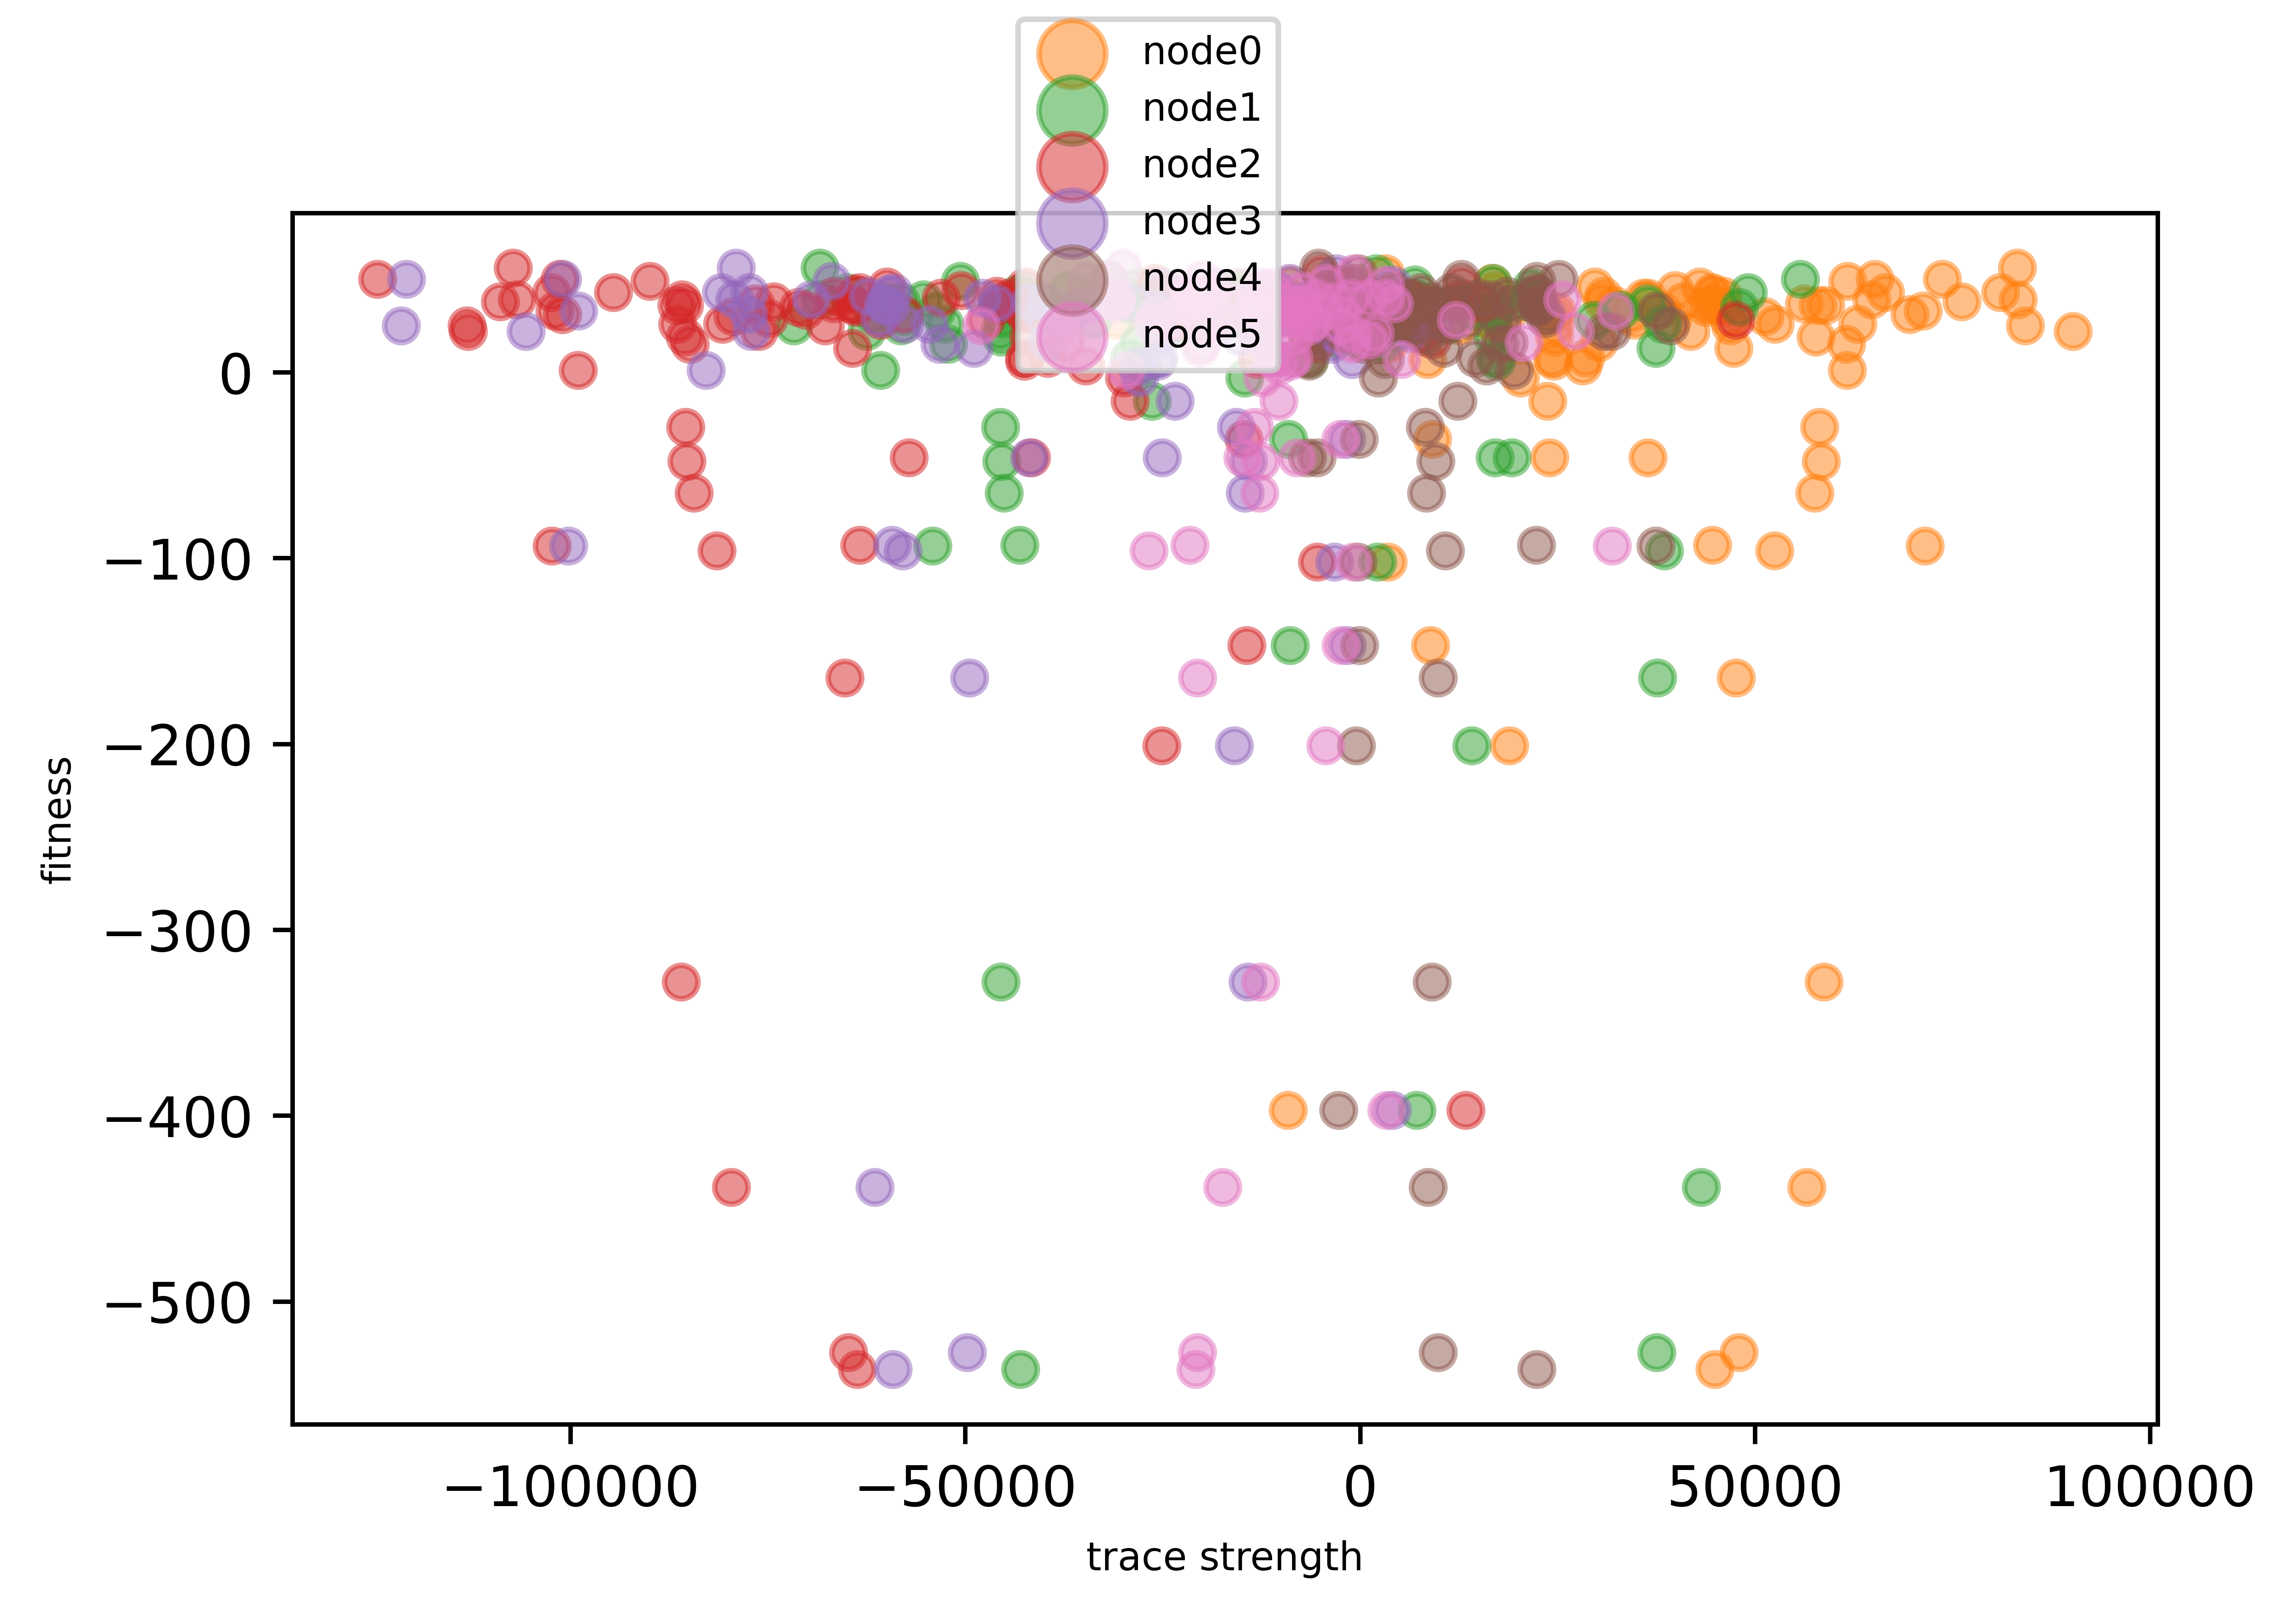

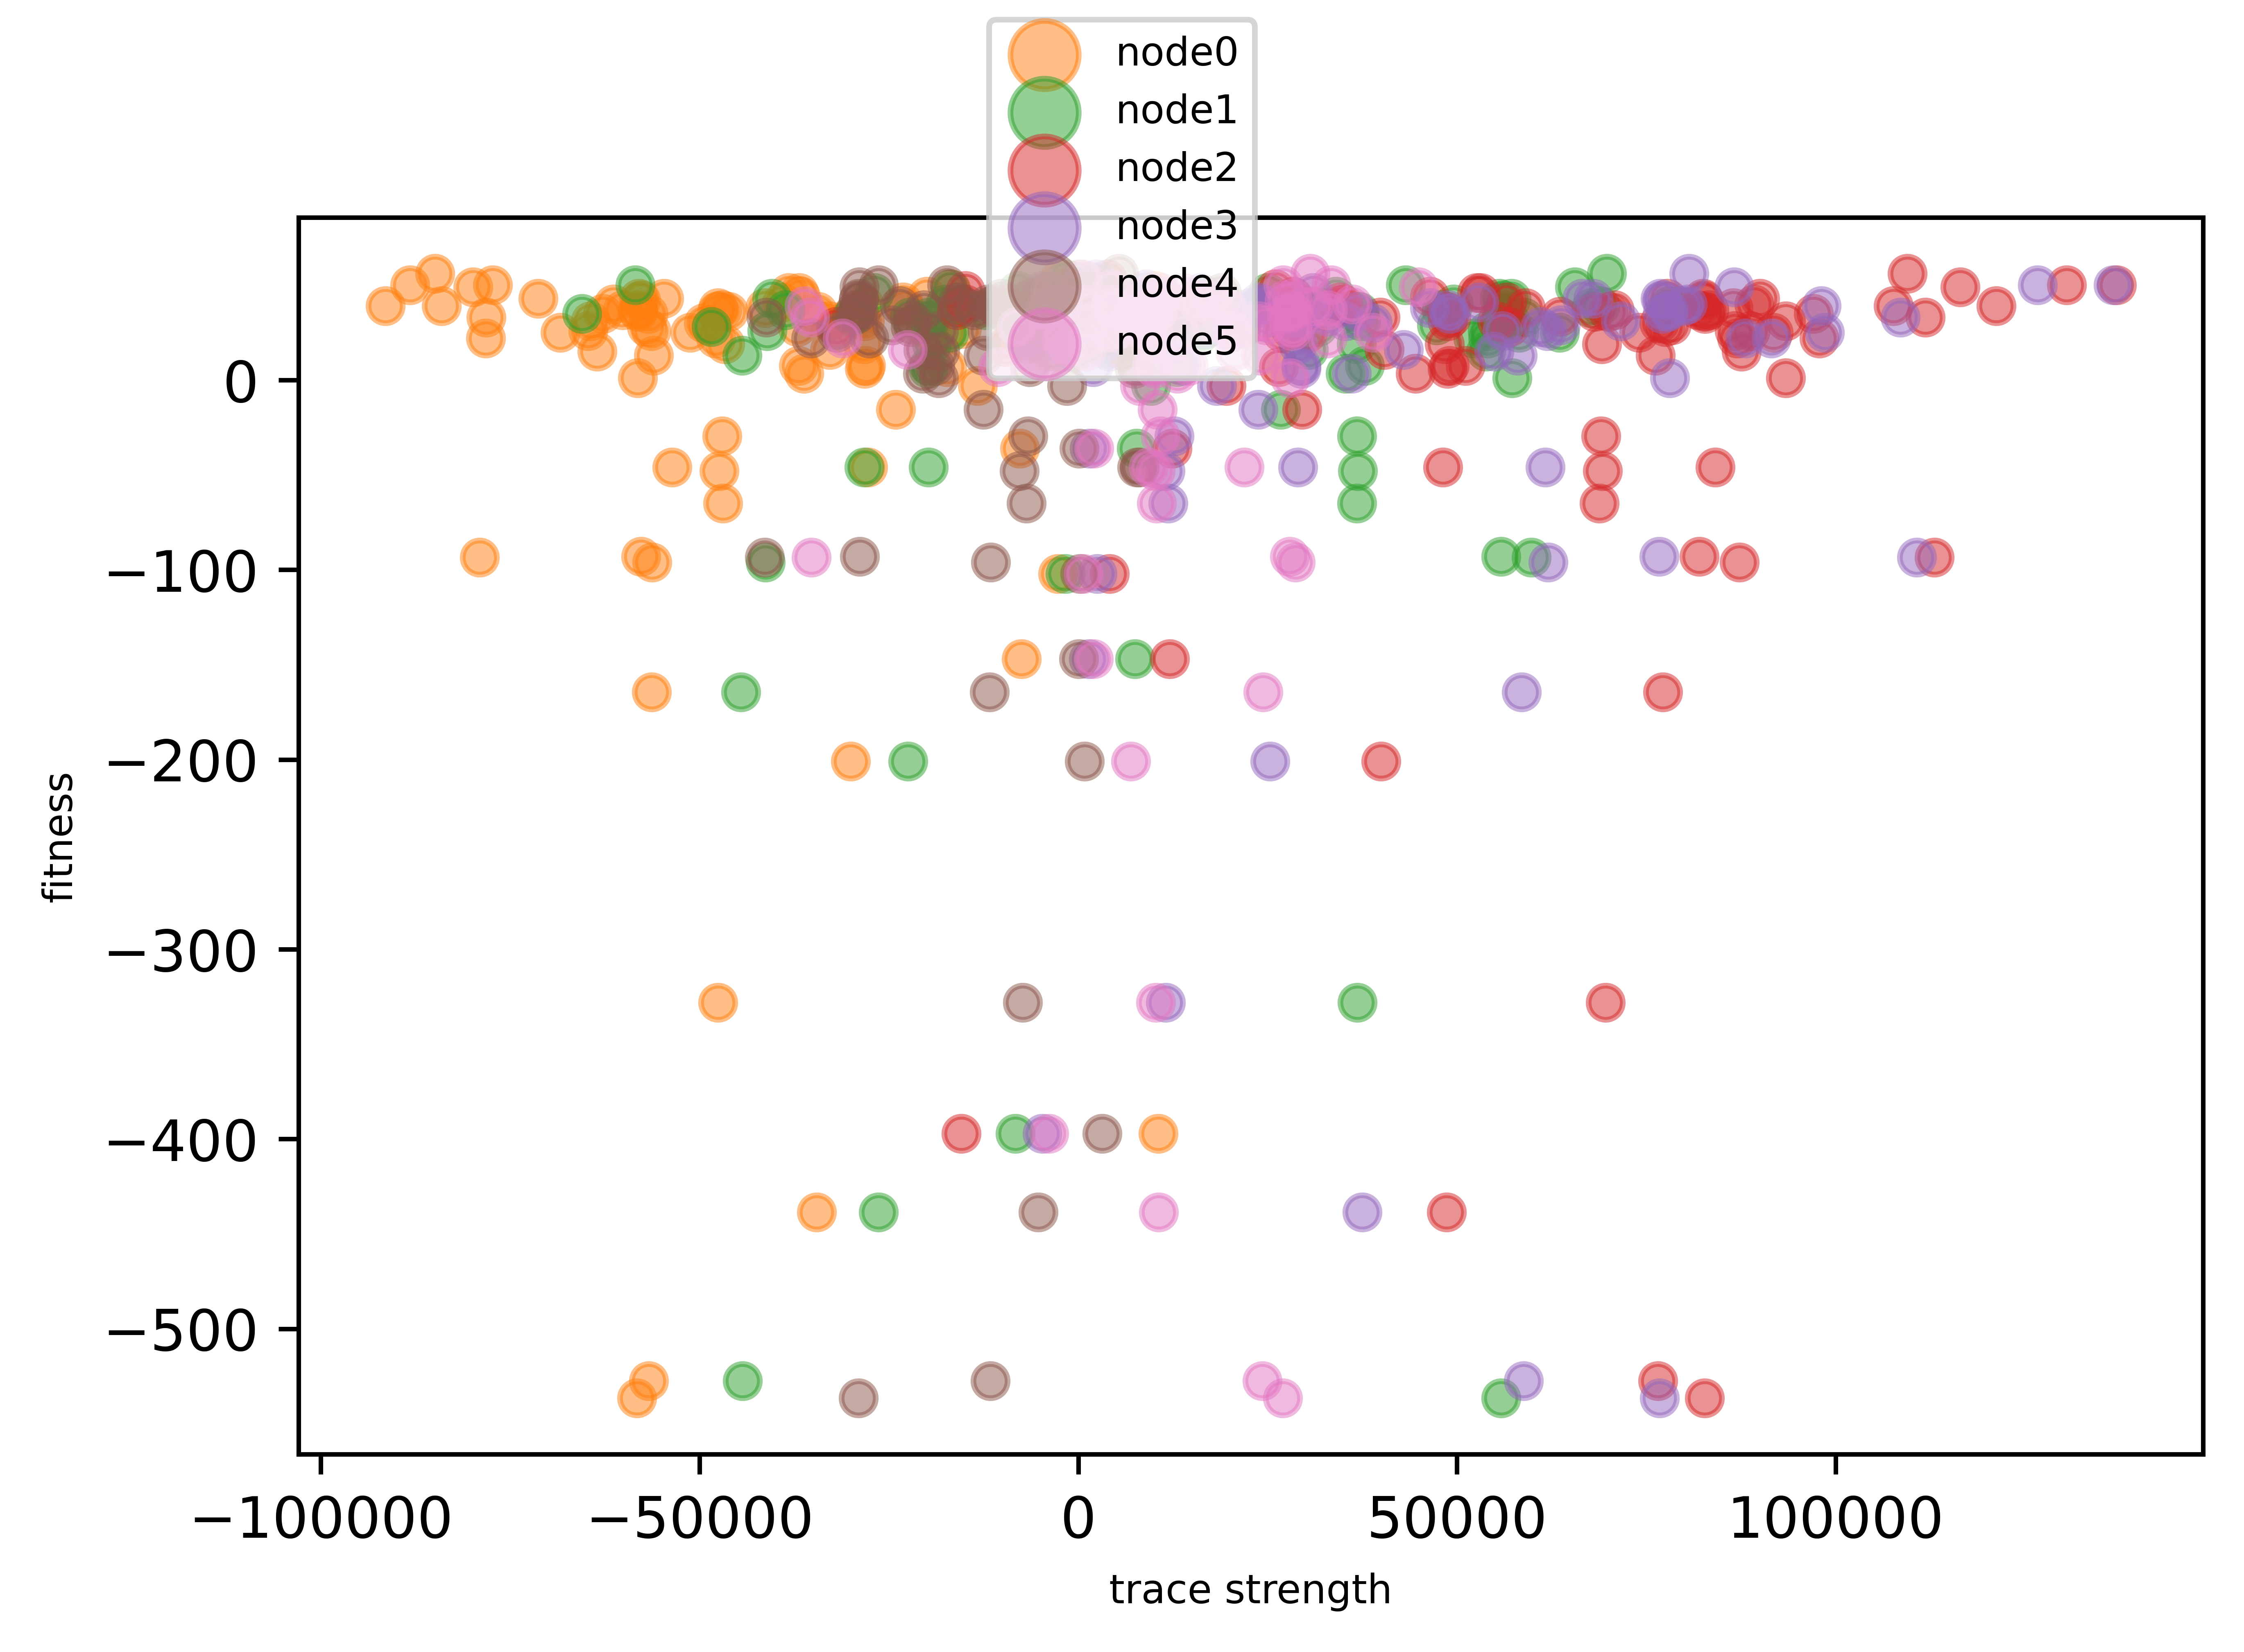

In [15]:
# plot weights

# node 3_1
fig = plt.figure(1)
ax = fig.add_subplot(111)

colors = ['C1', 'C2','C3', 'C4', 'C5', 'C6']
for node in range(6):
    ax.scatter(weight_traces[:,0,node], fitness, c=colors[node], alpha=0.5, label='node' + str(node))

ax.set_xlabel('trace strength', fontsize=7)
ax.set_ylabel('fitness', fontsize=7)

fig.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                                   # set the figure resolution dpi value to 1000
plt.show()

fig_name = 'weigth_traces_1.png'
fig.savefig(fig_name)

# node 3_2

fig2 = plt.figure(2)
ax = fig2.add_subplot(111)

colors = ['C1', 'C2','C3', 'C4', 'C5', 'C6']
for node in range(6):
    ax.scatter(weight_traces[:,1,node], fitness, c=colors[node], alpha=0.5, label='node' + str(node))

# We will then label the three axes using the percentages explained for each major component.
ax.set_xlabel('trace strength', fontsize=7)
ax.set_ylabel('fitness', fontsize=7)

fig2.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                                   # set the figure resolution dpi value to 1000
plt.show()

fig2_name = 'weigth_traces_2.png'
fig2.savefig(fig2_name)

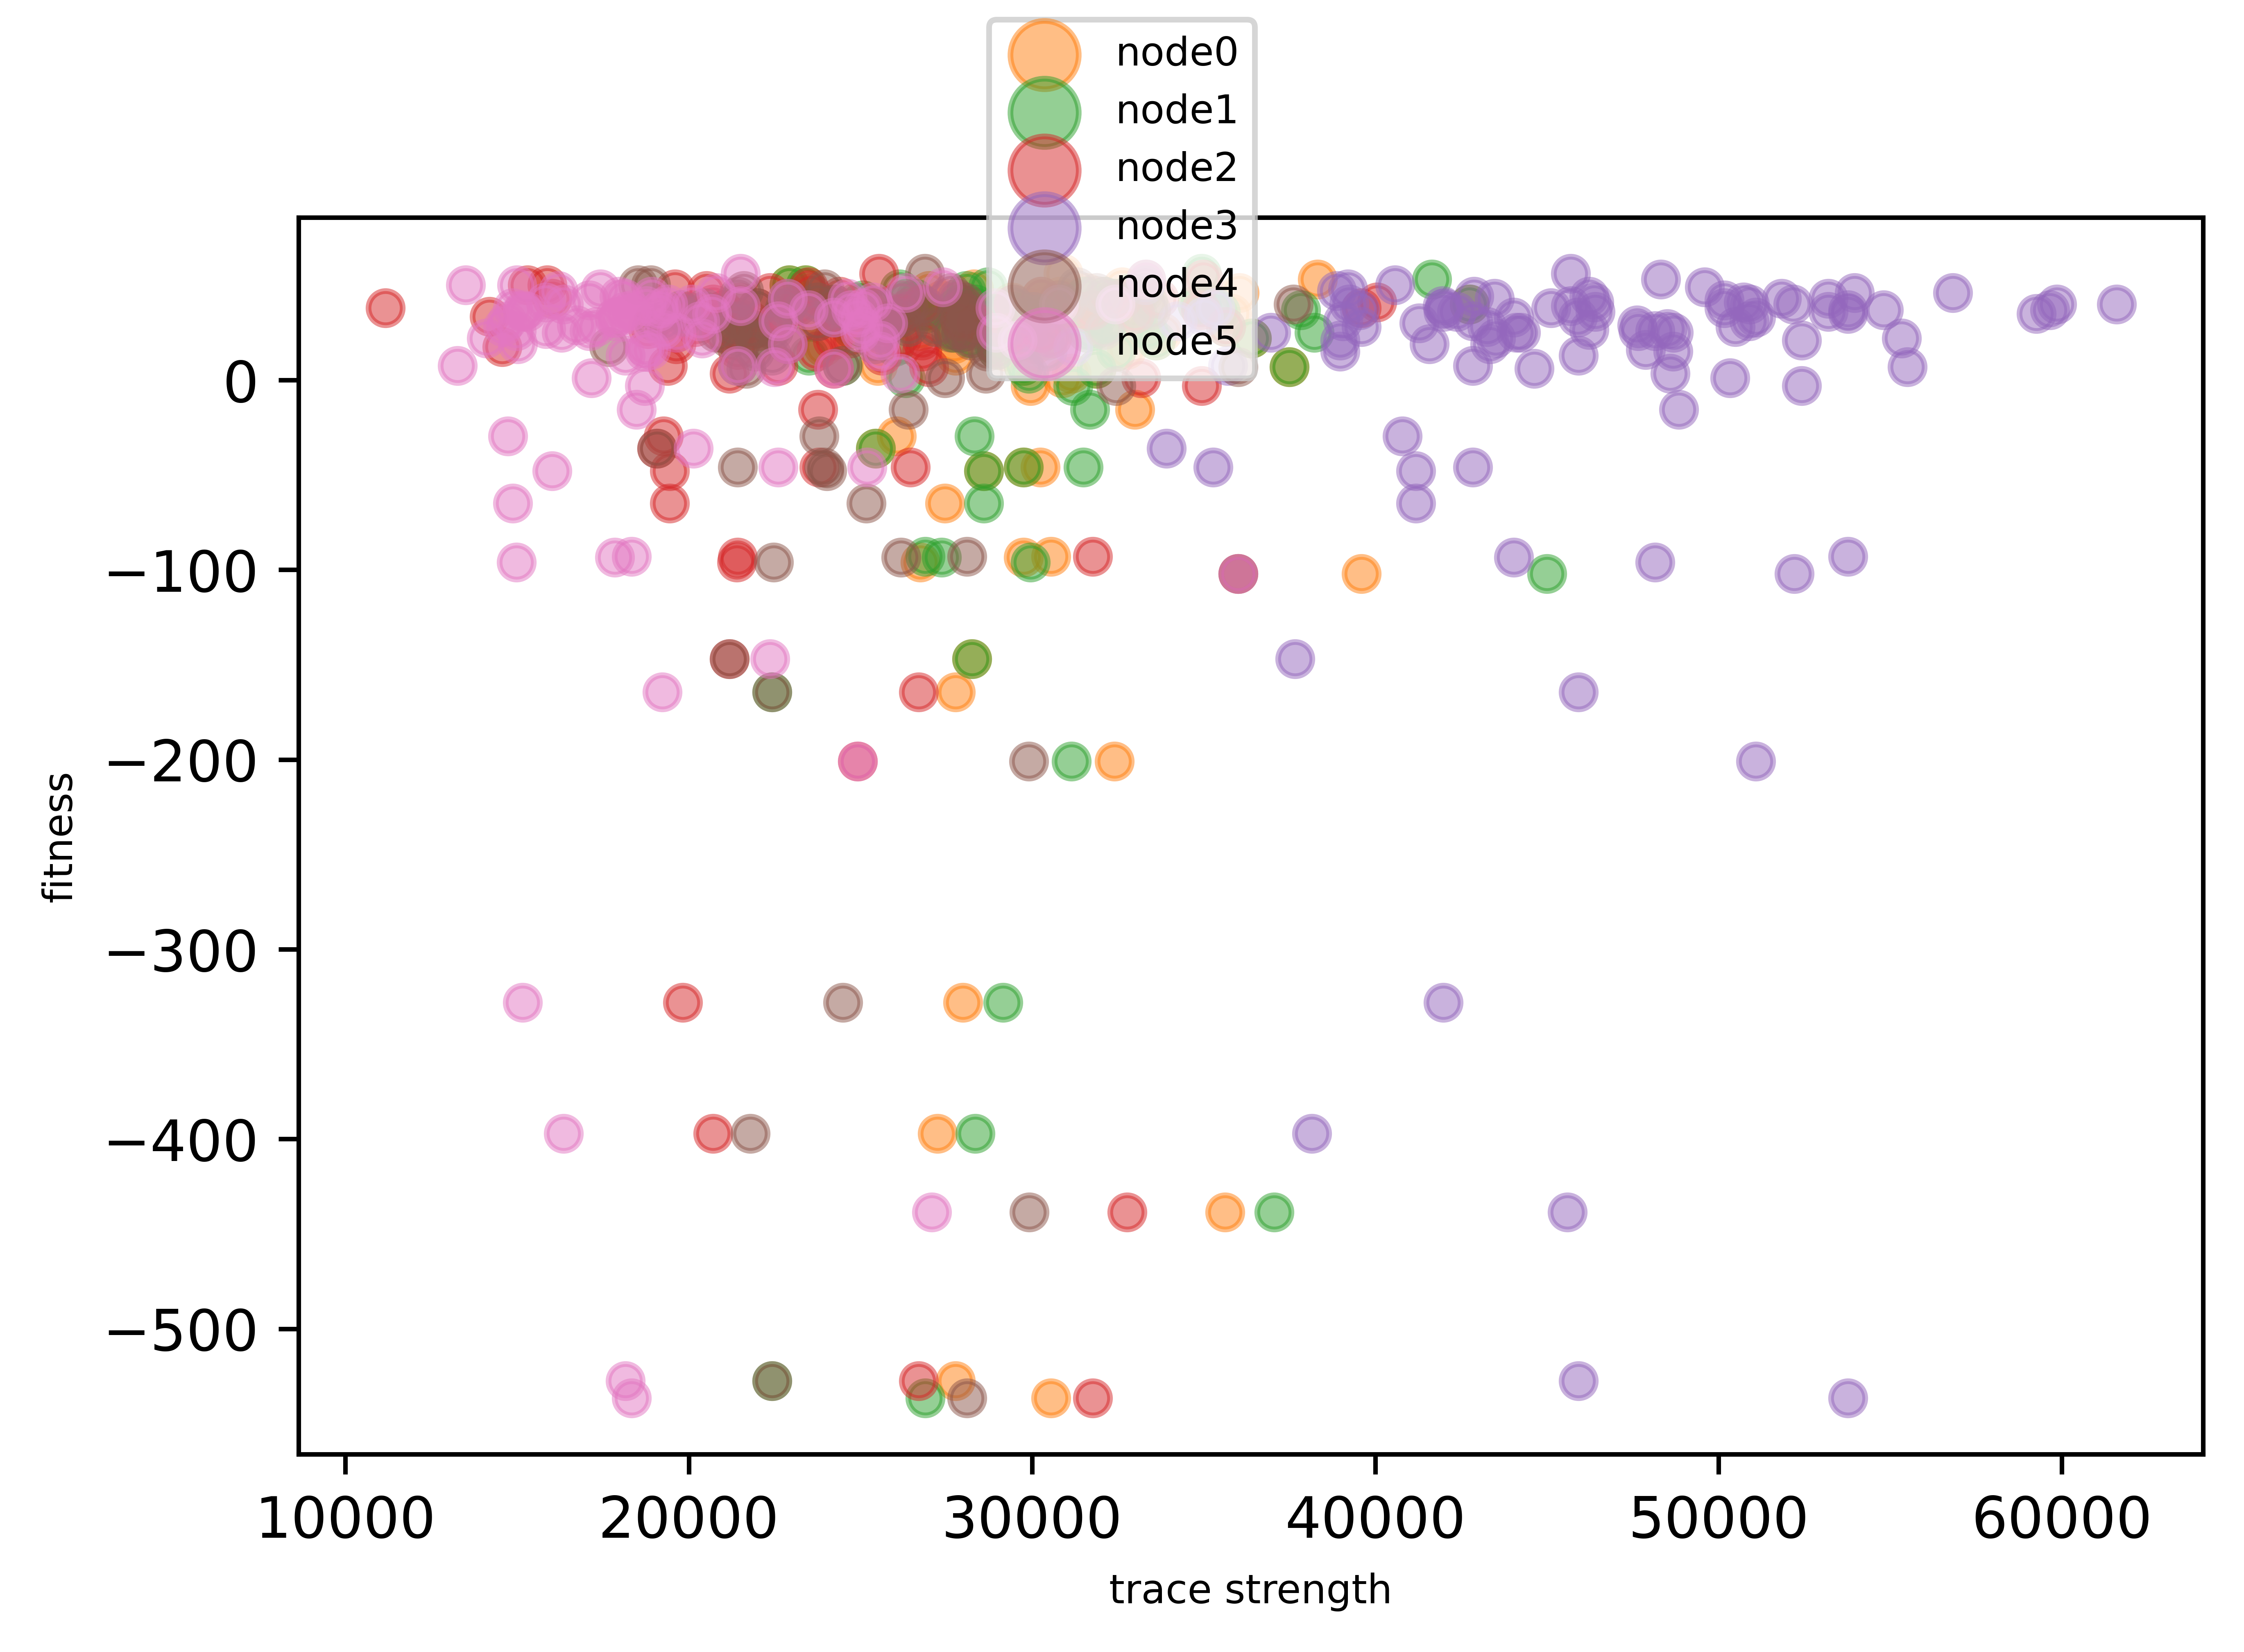

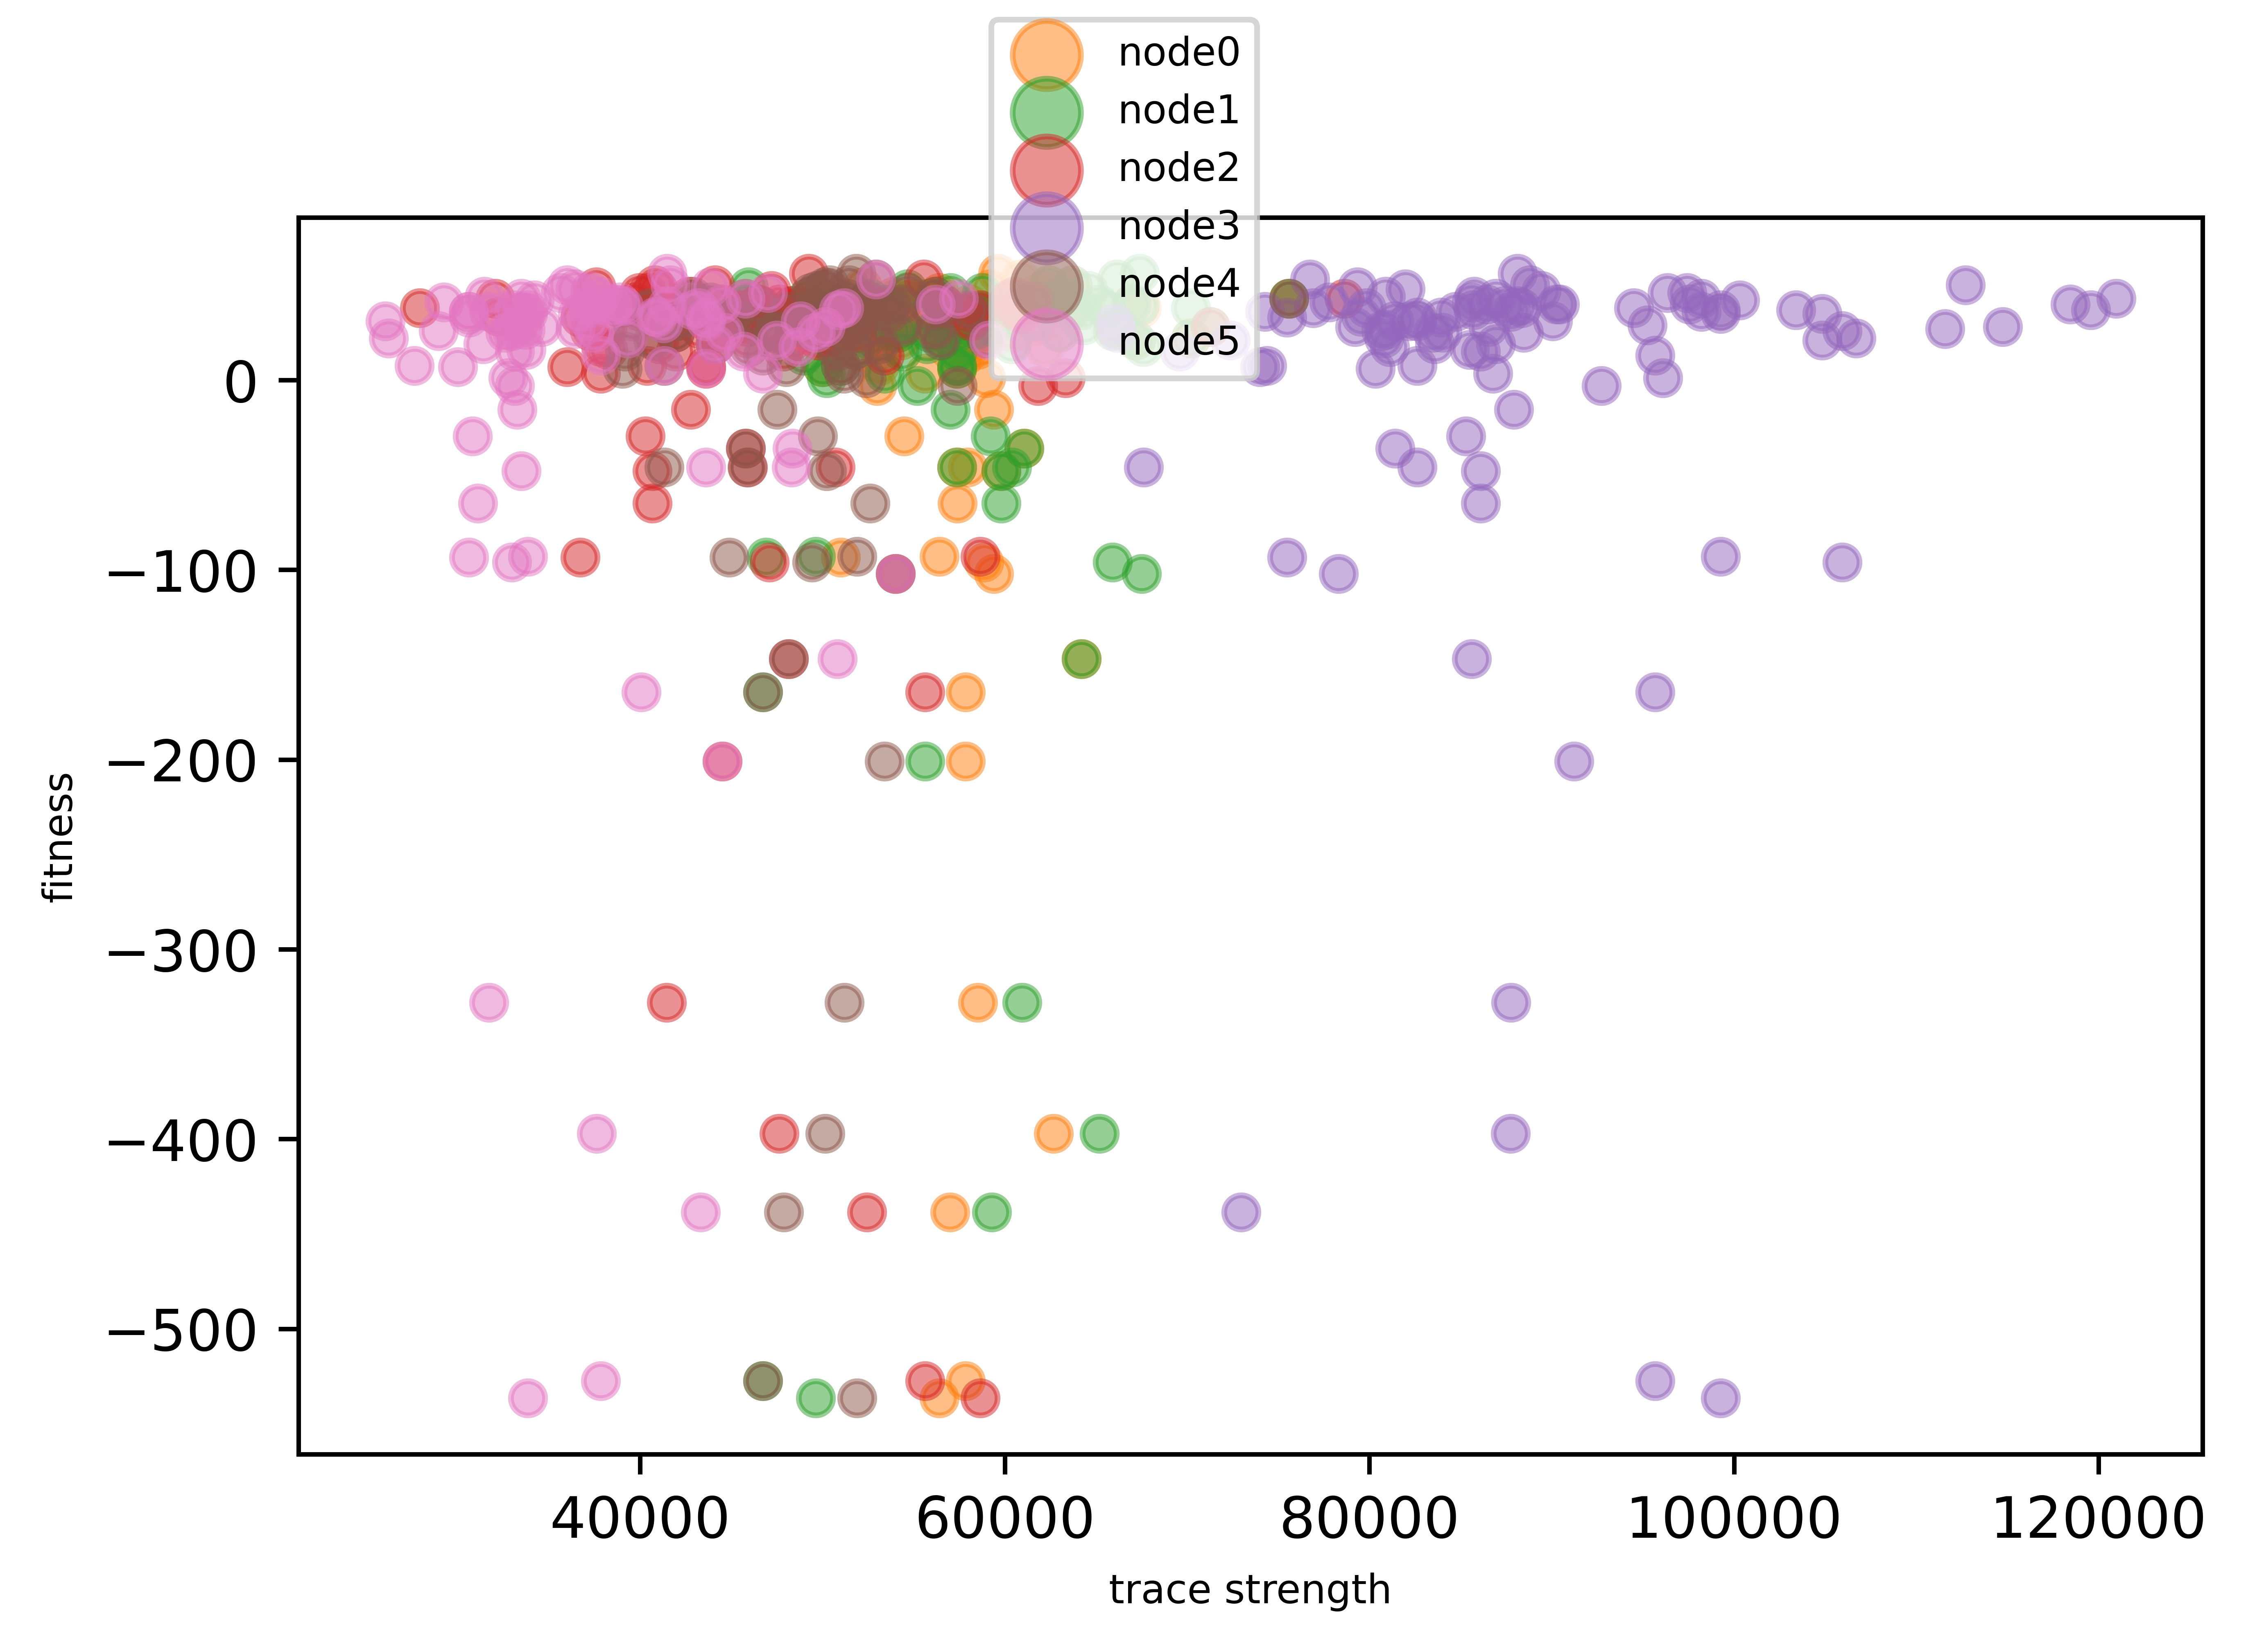

In [17]:
# plot delay

# node 3_1
fig = plt.figure(1)
ax = fig.add_subplot(111)

colors = ['C1', 'C2','C3', 'C4', 'C5', 'C6']
for node in range(6):
    ax.scatter(delay_traces[:,0,node], fitness, c=colors[node], alpha=0.5, label='node' + str(node))

ax.set_xlabel('trace strength', fontsize=7)
ax.set_ylabel('fitness', fontsize=7)

fig.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                                   # set the figure resolution dpi value to 1000
plt.show()

fig_name = 'delay_traces_1.png'
fig.savefig(fig_name)

# node 3_2

fig2 = plt.figure(2)
ax = fig2.add_subplot(111)

colors = ['C1', 'C2','C3', 'C4', 'C5', 'C6']
for node in range(6):
    ax.scatter(delay_traces[:,1,node], fitness, c=colors[node], alpha=0.5, label='node' + str(node))

ax.set_xlabel('trace strength', fontsize=7)
ax.set_ylabel('fitness', fontsize=7)

fig2.legend(fontsize = 'x-small', loc='upper center', markerscale=2)
plt.autoscale()
plt.rcParams["figure.dpi"] = 1000                                   # set the figure resolution dpi value to 1000
plt.show()

fig2_name = 'delay_traces_2.png'
fig2.savefig(fig2_name)